# Fake Album Cover Game

## Table of Contents
Creating randomly generated album covers with:

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>

<li><a href="#ref1">Creating the function display_cover</a></li>
<li><a href="#ref2">Loading a random page from Wikipedia</a></li>
<li><a href="#ref3">Extracting the Title of the Article</a></li>
<li><a href="#ref4"> Displaying the Album Cover</a></li>


</ol>



</div>



Inspiration: [Fake Album Covers](https://fakealbumcovers.com/)

#### Import libraries 

In [5]:
from IPython.display import Image as IPythonImage
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw
from PIL import ImageFont

##  Part 1: Creating the function display_cover <a id='ref1'></a>

#### Helper function to superimpose text on image 

In [6]:
def display_cover(top,bottom ):
    """This function
    """
    import requests
   

    name='album_art_raw.png'
    # Now let's make get an album cover.
    # https://picsum.photos/ is a free service that offers random images.
    # Let's get a random image:
    album_art_raw = requests.get('https://picsum.photos/500/500/?random')
    # and save it as 'album_art_raw.png'
    with open(name,'wb') as album_art_raw_file:
       album_art_raw_file.write(album_art_raw.content)
    # Now that we have our raw image, let's open it 
    # and write our band and album name on it
    img = Image.open("album_art_raw.png")
    draw = ImageDraw.Draw(img)

    # We'll choose a font for our band and album title, 
    # run "% ls /usr/share/fonts/truetype/dejavu" in a cell to see what else is available,
    # or download your own .ttf fonts!
   

    
    band_name_font = ImageFont.truetype(font="Arial", size=25, index=0, encoding='', layout_engine=None) #25pt font
    album_name_font = ImageFont.truetype(font="Arial", size=20, index=0, encoding='', layout_engine=None) # 20pt font

    # the x,y coordinates for where our album name and band name text will start
    # counted from the top left of the picture (in pixels)
    band_x, band_y = 50, 50
    album_x, album_y = 50, 400

    # Our text should be visible on any image. A good way
    # of accomplishing that is to use white text with a 
    # black border. We'll use the technique shown here to draw the border:
    # https://mail.python.org/pipermail/image-sig/2009-May/005681.html
    outline_color ="black"

    draw.text((band_x-1, band_y-1), top, font=band_name_font, fill=outline_color)
    draw.text((band_x+1, band_y-1), top, font=band_name_font, fill=outline_color)
    draw.text((band_x-1, band_y+1), top, font=band_name_font, fill=outline_color)
    draw.text((band_x+1, band_y+1), top, font=band_name_font, fill=outline_color)

    draw.text((album_x-1, album_y-1), bottom , font=album_name_font, fill=outline_color)
    draw.text((album_x+1, album_y-1), bottom , font=album_name_font, fill=outline_color)
    draw.text((album_x-1, album_y+1), bottom , font=album_name_font, fill=outline_color)
    draw.text((album_x+1, album_y+1), bottom , font=album_name_font, fill=outline_color)

    draw.text((band_x,band_y),top,(255,255,255),font=band_name_font)
    draw.text((album_x, album_y),bottom,(255,255,255),font=album_name_font)

    return img

## Part 2: Loading a random page from Wikipedia  <a id='ref2'></a>

In [7]:
import requests

#### Wikipedia page is converted to a string

In [21]:
wikipedia_link='https://en.wikipedia.org/wiki/Special:Random'
raw_random_wikipedia_page=requests.get(wikipedia_link)

####  Use the data attribute **text** to extract the XML as a text file a string and assign the result variable **page**:

In [22]:
page=raw_random_wikipedia_page.text

# Part 3: Extracting the Title of the Article <a id='ref3'></a>  

In [23]:
import lxml
b_start=page.find('<title>')
start=len('<title>')
b_end=page.find('</title>')
b=page[b_start+start:b_end]

#getting rid of the term Wikipedia

band_title=b.replace(' - Wikipedia','')
print(band_title)

Julián Arango


#### Repeat the second and third step, to extract the title of a second Wikipedia article but use the result to album_title

In [14]:
wikipedia_link2='https://en.wikipedia.org/wiki/Special:Random'
raw_random_wikipedia_page2=requests.get(wikipedia_link2)

In [15]:
page2=raw_random_wikipedia_page2.text

In [16]:
import lxml
a_start=page2.find('<title>')
start2=len('<title>')
a_end=page2.find('</title>')
a=page2[a_start+start2:a_end]

#getting rid of the term Wikipedia

album_title=a.replace(' - Wikipedia','')
print(album_title)

Tymianki-Skóry


### The Band Name and Title

In [24]:
print("Your band: ", band_title)
print("Your album: ", album_title)

Your band:  Julián Arango
Your album:  Tymianki-Skóry


## Part 4: Displaying the Album Cover  <a id='ref4'></a>

#### Using the function display_cover to display the album cover with two random article titles representing the name of the band and the title of the album.

In [25]:
img=display_cover(top=band_title,bottom=album_title)

In [26]:
img.save('sample-out.png')

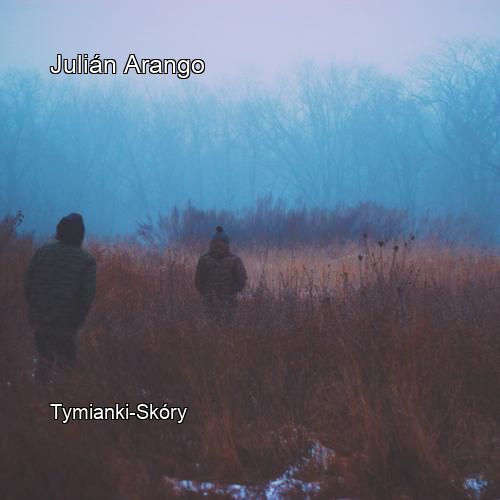

In [27]:
IPythonImage(filename='sample-out.png')

 <hr>
Copyright &copy; 2018 cognitiveclass.ai. This notebook and its source code are released under the terms of the MIT License.